In [82]:
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("../data/retail_case_data.csv")

## Defining the best customer's features
First we have to define which are the features that impact the most on Response Rate. 
To do that, we'll use Random Forest algoritm to see the feature importante and be able to define which features have the bigger impact on previsions

In [78]:
# cleasing and featuring...
df['Income'].fillna(0, inplace=True)
df['Age'] = datetime.today().year - df['Year_Birth']

map_educ = {
    '2n Cycle': 1, 
    'Basic': 2, 
    'Graduation': 3, 
    'Master': 4, 
    'PhD': 5
}
df['Numeric_Graduation'] = df['Education'].map(map_educ)

map_marital = {
    'Single': 1, 
    'Together': 2, 
    'Married': 3, 
    'Divorced': 4, 
    'Widow': 5, 
    'Alone': 6, 
    'Absurd': 7, 
    'YOLO': 8
}
df['Numeric_Marital_Status'] = df['Marital_Status'].map(map_marital)

/tmp/ipykernel_121228/3597114605.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(0, inplace=True)


In [79]:
X = df.drop(['ID', 'Response', 'Marital_Status', 'Education', 'Dt_Customer'], axis=1) # Features
y = df['Response'] # Target

# Split the dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_forest_model = RandomForestClassifier()

# Training...
random_forest_model.fit(X_train, y_train)

# Previsioning...
previsoes = random_forest_model.predict(X_test)

importancias_features = random_forest_model.feature_importances_
importancias_df = pd.DataFrame({'Feature': X.columns, 'Importância': importancias_features})
importancias_df = importancias_df.sort_values(by='Importância', ascending=True)

In [83]:
acuracia = accuracy_score(y_test, previsoes)
print("Accuracy of the model: ", acuracia)

Acurácia do modelo de Árvore de Decisão: 0.8660714285714286


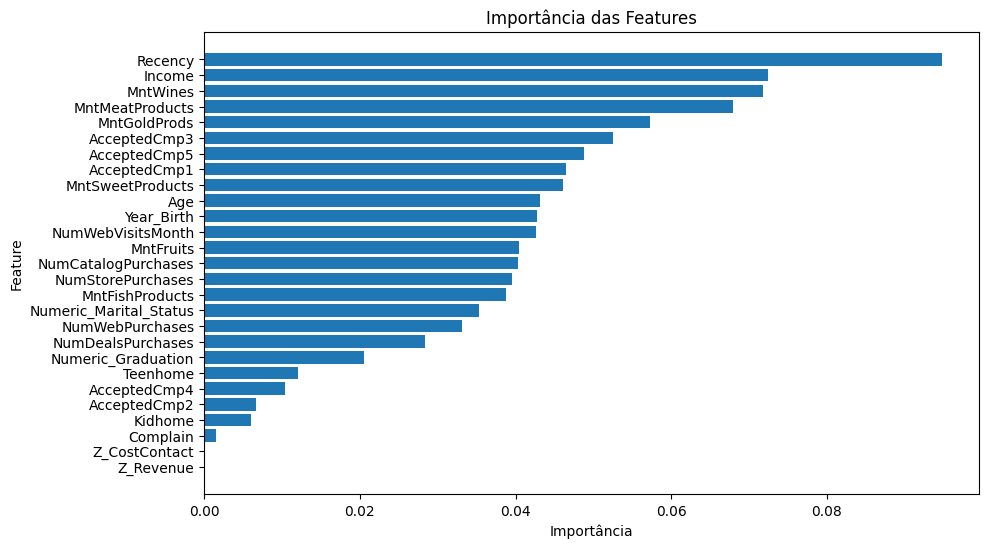

In [68]:
plt.figure(figsize=(10, 6))
plt.barh(importancias_df['Feature'], importancias_df['Importância'])
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features')
plt.show()

## Conclusion

As we can see on the chart, (keeping in mind the model's accuracy of 0.8660714285714286, which is good), the features that has bigger impact on previsions is:
- Recency
- Income
- MntWines
- MntMeatProducts
- MntGoldProducts

With these data we can think that the best customer profile is:<br>
"Customer with high Income, who like to buy Wines, Meat and others Gold products and had buy something for no long"

----

## Clustering the dataset
Now we have to classify the customers based on the dataset features to see which type/group of customers has higher Response Rate.<br>
To do that we'll use k-means algoritm and analyze the result using Response column.

With this data we'll be able to project the financial impact.

In [69]:
X = df.drop(['ID', 'Response', 'Marital_Status', 'Education', 'Dt_Customer'], axis=1)

# Initialyzing...
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X)

rotulos = kmeans.labels_

# Adding the labels on main dataframe
df['cluster'] = rotulos

In [70]:
z = df.groupby('cluster')['Response'].mean()
z

cluster
0    0.110059
1    0.246815
2    0.112125
Name: Response, dtype: float64

The best cluster that has higher Response Rate is the 1

In [71]:
df.groupby('cluster')['ID'].count()

cluster
0    845
1    628
2    767
Name: ID, dtype: int64

We have 28% of the dataset composed of customers classified as the cluster 1

## Conclusion and projections

With 28% of customers of cluster 1 we had 15% of Response Rate, if we target the whole campaign for only those clients that fits cluster 1 characteristics, that means, 100% of customers of cluster 1, we may have 53,6% of Response Rate, which will represent **$13128.43 in revenue**, making the campaign positive.